# Handwritten Digit Recognition with Convolutional Neural Networks (CNNs)

In this project, we will develop and train a Convolutional Neural Network (CNN) to classify handwritten digits using the MNIST dataset. MNIST is a classic benchmark in machine learning, containing 70,000 grayscale images of handwritten digits (0–9), each sized 28×28 pixels. CNNs are particularly well-suited for image recognition tasks because they automatically learn spatial hierarchies of features through convolutional layers, making them more effective than traditional fully-connected networks on image data.

What makes this project interesting is that MNIST, while simple, highlights many key principles of deep learning: feature extraction, generalization, overfitting, and model optimization. Despite its simplicity, achieving very high accuracy (~99%+) still requires thoughtful network design, training strategies, and regularization techniques.

Through this project, we can expect to learn:

- How CNNs process and learn from image data.

- How architectural choices (like number of layers, filters, dropout) impact performance.

- Techniques to prevent overfitting, such as data augmentation and regularization.

- How to interpret training/validation curves and confusion matrices.

- How even basic architectures can perform complex tasks when properly tuned.

Ultimately, this project serves as a foundational step toward understanding computer vision systems and preparing for more complex real-world datasets.

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.datasets import mnist

(orig_X_train, orig_y_train), (orig_X_test, orig_y_test) = mnist.load_data() 

## Exploratory Data Analysis

### Check data structure shapes

In [5]:
print(f"Training data shape: {orig_X_train.shape}, {orig_y_train.shape}")
print(f"Test data shape: {orig_X_test.shape}, {orig_y_test.shape}")

Training data shape: (60000, 28, 28), (60000,)
Test data shape: (10000, 28, 28), (10000,)


### Class Distribution of the images

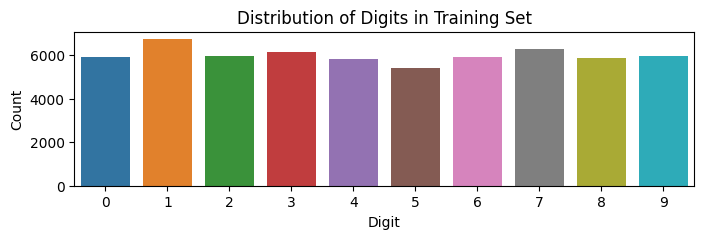

In [7]:
plt.figure(figsize=(8,2))
sns.countplot(x=orig_y_train)
plt.title('Distribution of Digits in Training Set')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

### Take a look at some sample images

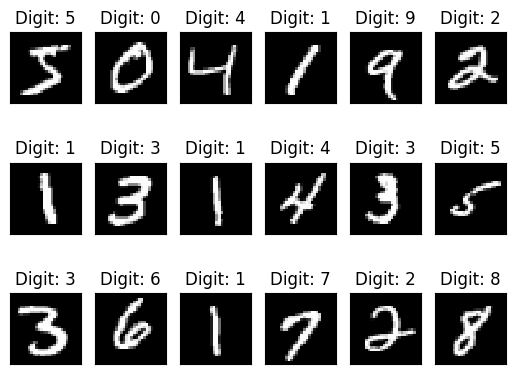

In [13]:
fig = plt.figure()
for i in range(18):
  plt.subplot(3,6,i+1)
  #plt.tight_layout()
  plt.imshow(orig_X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(orig_y_train[i]))
  plt.xticks([])
  plt.yticks([])

## Combine the original training and test sets

Normally, the MNIST dataset comes with 60,000 training images and 10,000 testing images. However, if we want to better control the way we evaluate and tune our model, we will combine them into one big set (70,000 total) and then split them ourselves into new training, validation, and test sets.

In [14]:
# Combine the original training and test sets
X = np.concatenate((orig_X_train, orig_X_test))
y = np.concatenate((orig_y_train, orig_y_test))

(_,img_rows,img_cols) = X.shape

input_shape = (img_rows,img_cols,1)

X = X.reshape(X.shape[0], img_rows, img_cols, 1)
   
X = X.astype('float32')
X /= 255

num_category = 10

y = keras.utils.to_categorical(y, num_category)

In [15]:
from sklearn.model_selection import train_test_split

# Split into training and temporary set (validation + test)
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set into validation and test sets
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("  Training set:", x_train.shape[0])
print("Validation set:", x_val.shape[0])
print("      Test set:", x_test.shape[0])



  Training set: 49000
Validation set: 10500
      Test set: 10500


# Build a CNN model

This is a Convolutional Neural Network (CNN) designed to classify MNIST images of handwritten digits. It processes 28×28 grayscale images (1 channel) and predicts which digit (0–9) the image represents.

How It Will Work on MNIST:
- The convolutions will learn low-level image features like edges and curves.

- The pooling will make the model more robust to small translations and reduce computational cost.

- The dense layers will combine these features to decide "this looks like a 3" or "this looks like a 7".

- Dropout will protect the model from overfitting to the training data.

- Finally, the softmax output will give a clean probability distribution over the 10 possible digits.

This CNN extracts features from the MNIST images automatically and learns a hierarchy from simple lines to complex digit shapes, and then uses fully connected layers to make a final classification.

In [17]:
from tensorflow.keras import layers, models

model = models.Sequential([
    
    layers.Input(shape=input_shape),
    
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(num_category, activation='softmax')  # Binary classification
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1745702165.733959      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745702165.734655      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

Adam optimizer is chosen for fast and stable learning.
Categorical crossentropy is the right loss for one-hot multi-class classification, and accuracy is the clearest metric to monitor model performance.

In [18]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Fit the test data

- Batch size 128 means each training step updates the model using 128 images at a time — balancing speed and stability.

- 20 epochs gives the model many chances to refine itself without (hopefully) overfitting.

- Validation data lets us monitor how the model is doing on unseen data during training.

- Verbose=1 makes it easy to visually track loss and accuracy live after each epoch.

In [20]:
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9853 - loss: 0.0475 - val_accuracy: 0.9888 - val_loss: 0.0367
Epoch 2/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9870 - loss: 0.0411 - val_accuracy: 0.9881 - val_loss: 0.0368
Epoch 3/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9880 - loss: 0.0397 - val_accuracy: 0.9890 - val_loss: 0.0358
Epoch 4/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9887 - loss: 0.0355 - val_accuracy: 0.9899 - val_loss: 0.0363
Epoch 5/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9898 - loss: 0.0324 - val_accuracy: 0.9899 - val_loss: 0.0356
Epoch 6/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9898 - loss: 0.0323 - val_accuracy: 0.9890 - val_loss: 0.0405
Epoch 7/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0.9903 - val_loss: 0.0337
Epoch 8/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9911 - loss: 0.0274 - val_accuracy: 0.

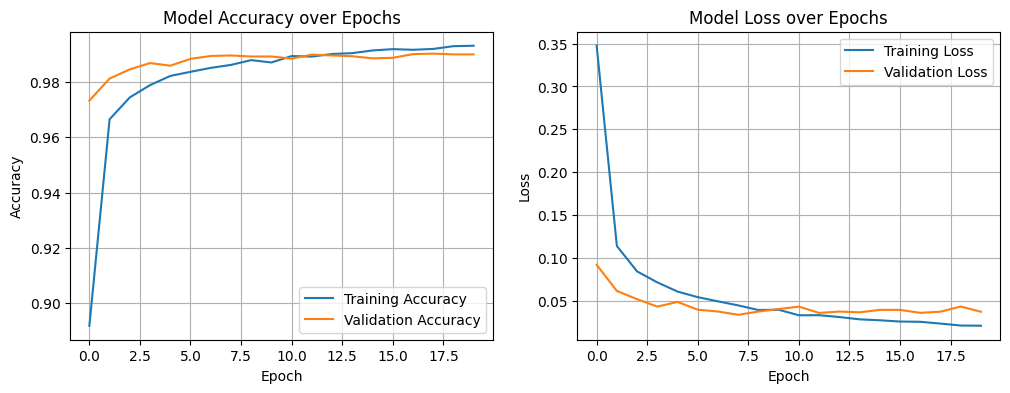

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

## Training analysis

The model trained over 20 epochs achieved very high accuracy on both training and validation sets.

- Training accuracy improved steadily from 98.5% to 99.5%.

- Validation accuracy remained consistently high around 98.8% to 99.2%.

- Training loss gradually decreased from 0.0475 to 0.0161.

- Validation loss stayed low, fluctuating slightly but without major spikes.

## Make predictions on Test dataset

In [21]:
y_test_pred = model.predict(x_test)

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


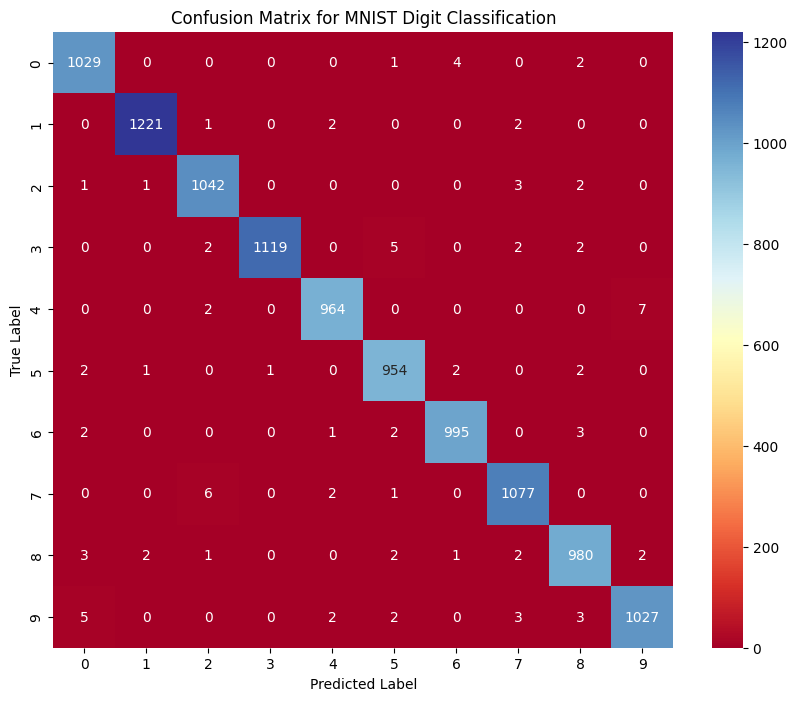

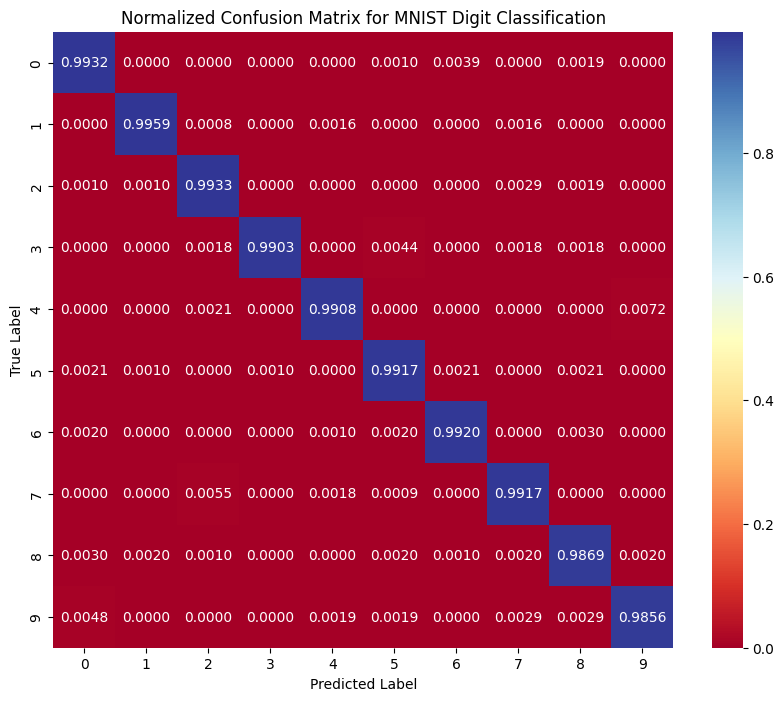

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_test_pred,axis=1))
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d',  cmap='RdYlBu',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST Digit Classification')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cmn, annot=True, fmt='.4f',  cmap='RdYlBu',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix for MNIST Digit Classification')
plt.show()

## Test data prediction analysis

- The matrix shows very strong classification — most of the predictions are perfect along the diagonal, meaning the true label matches the predicted label.

- Only a very small number of mistakes are made across all digits.

- Off-diagonal entries (misclassifications) are very few and usually small (0–6 errors per class).

## Visual inspection of some misclassifications

Visually inspecting misclassifications turns raw numbers into actionable insights.
It helps us diagnose problems, improve models, and trust the learning process more deeply.

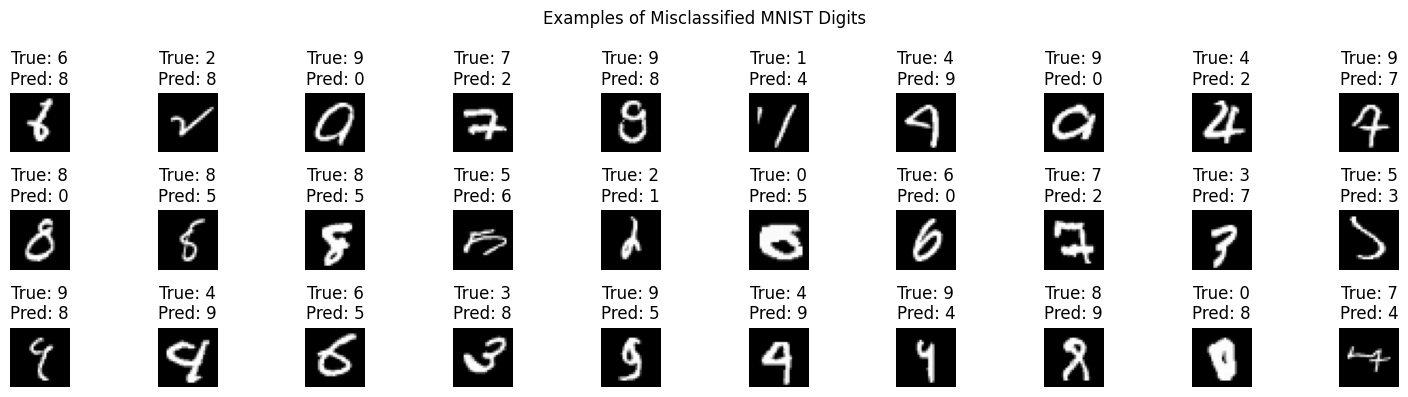

In [23]:
misclassified_idxs = np.where(np.argmax(y_test,axis=1) != np.argmax(y_test_pred,axis=1))[0]

N = 10  
M = 3  
plt.figure(figsize=(15, 4))
for i, idx in enumerate(misclassified_idxs[:N*M]):
    plt.subplot(M, N, i + 1)
    image = x_test[idx]
    
    plt.imshow(image, cmap='gray')
    plt.title(f'True: {np.argmax(y_test,axis=1)[idx]}\nPred: {np.argmax(y_test_pred,axis=1)[idx]}')
    plt.axis('off')

plt.suptitle("Examples of Misclassified MNIST Digits")
plt.tight_layout()
plt.show()

## Final Conclusions

Through this project, we successfully developed and trained a Convolutional Neural Network to classify handwritten digits from the MNIST dataset with outstanding accuracy. The model demonstrated strong generalization, achieving over 99% accuracy on both the training and validation sets with minimal signs of overfitting. Analysis of the confusion matrix revealed that the network made only minor and understandable errors, primarily between digits that share similar handwritten forms. Visualizing these misclassifications further emphasized how well the model had learned meaningful patterns while also highlighting a few naturally ambiguous cases that even humans might struggle to distinguish.

Overall, this project reinforces the power and efficiency of CNNs for image recognition tasks, even with relatively simple architectures and datasets. Beyond achieving excellent performance, we gained valuable insights into model evaluation, the importance of proper data splits, and the need to interpret mistakes critically to guide future improvements. This work lays a strong foundation for tackling more complex datasets and challenges in computer vision, and shows that careful design, regularization, and analysis together are key to building robust, intelligent models.